<a href="https://colab.research.google.com/github/vedha156/webscraping_project/blob/main/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

df = pd.read_csv("/content/netflix_titles.csv")
print("Data shape:", df.shape)
df.head()


Data shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.info()
df.describe(include='all')
df.isnull().sum()

df['country'] = df['country'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Not Rated")
df.drop_duplicates(inplace=True)

if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['year_added'] = df['date_added'].dt.year
    df['month_added'] = df['date_added'].dt.month


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


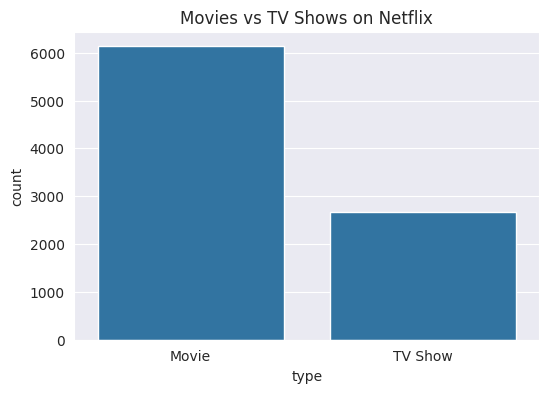

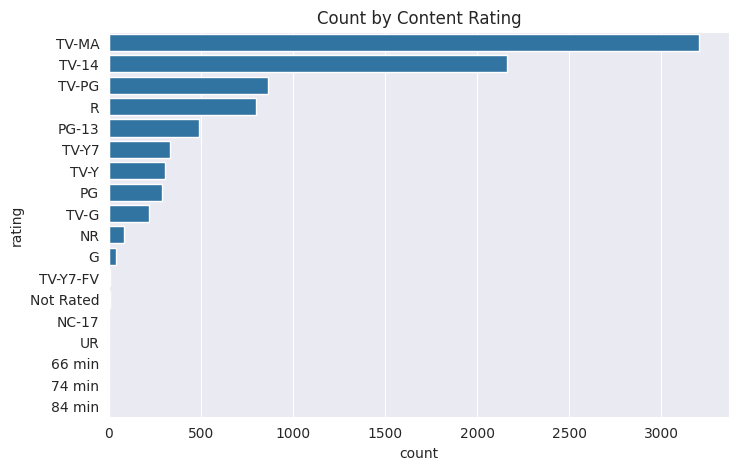

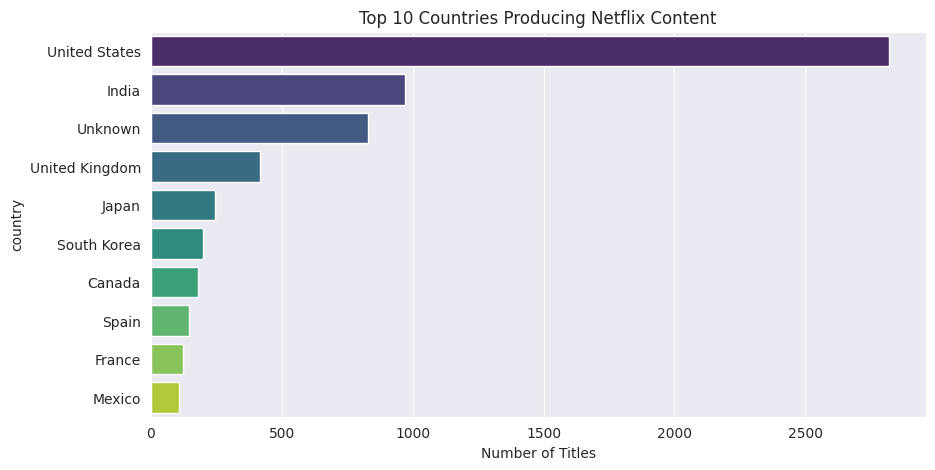

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Count by Content Rating")
plt.show()

top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="viridis", legend=False)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.show()

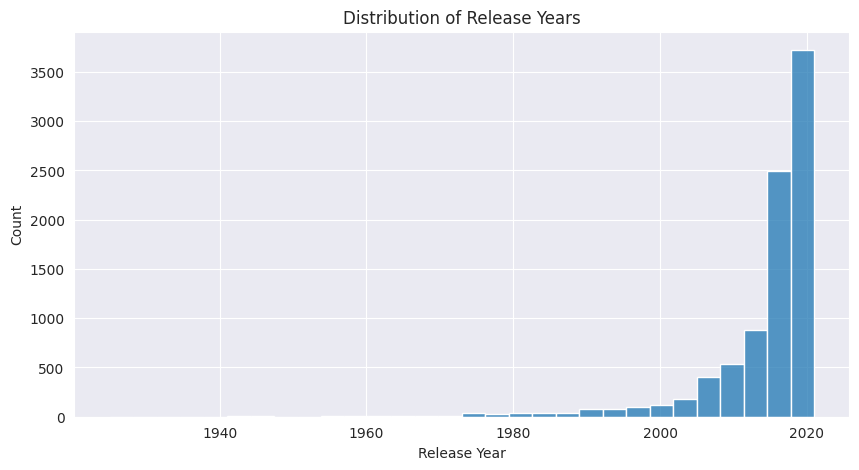

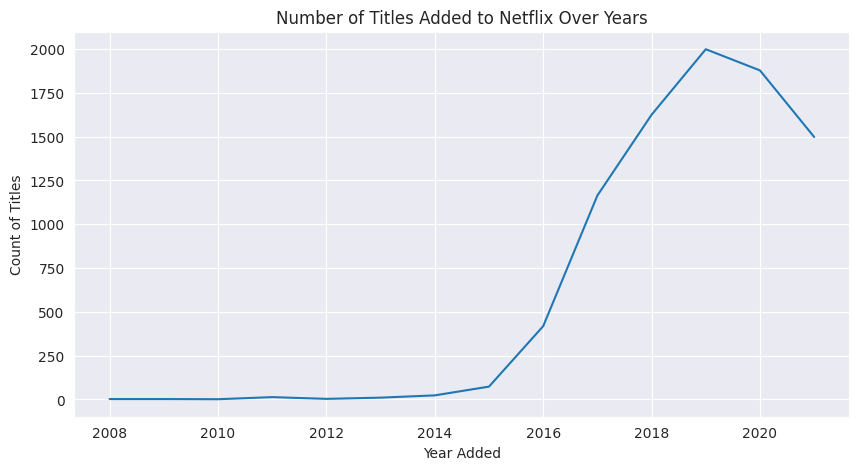

In [6]:
# Release Year & Content Over Time
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='release_year', bins=30, kde=False)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.show()

if 'year_added' in df.columns:
    plt.figure(figsize=(10,5))
    df['year_added'].value_counts().sort_index().plot(kind='line')
    plt.title("Number of Titles Added to Netflix Over Years")
    plt.xlabel("Year Added")
    plt.ylabel("Count of Titles")
    plt.show()


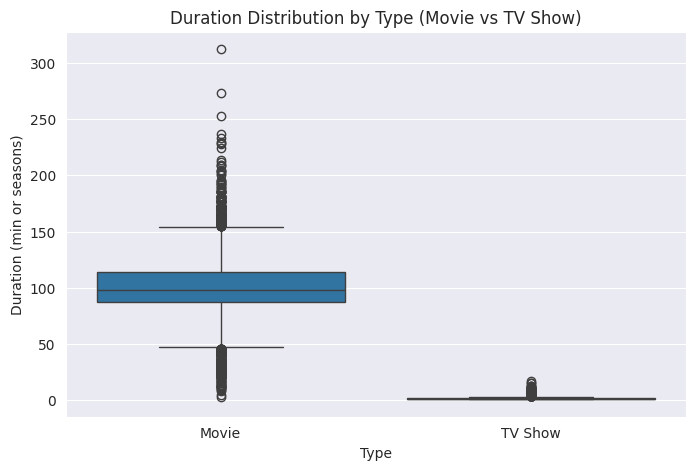

In [7]:
def get_duration(x):
    try:
        val = x.split()[0]
        return int(val)
    except:
        return np.nan

df['duration_int'] = df['duration'].apply(get_duration)

plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='duration_int', data=df)
plt.title("Duration Distribution by Type (Movie vs TV Show)")
plt.xlabel("Type")
plt.ylabel("Duration (min or seasons)")
plt.show()


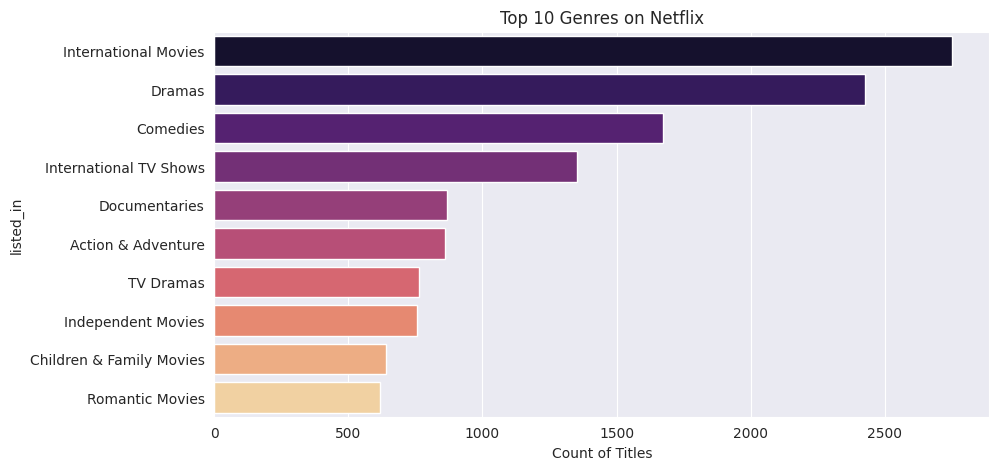

In [9]:
all_genres = df['listed_in'].str.split(", ").explode()
genre_counts = all_genres.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette="magma", legend=False)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count of Titles")
plt.show()

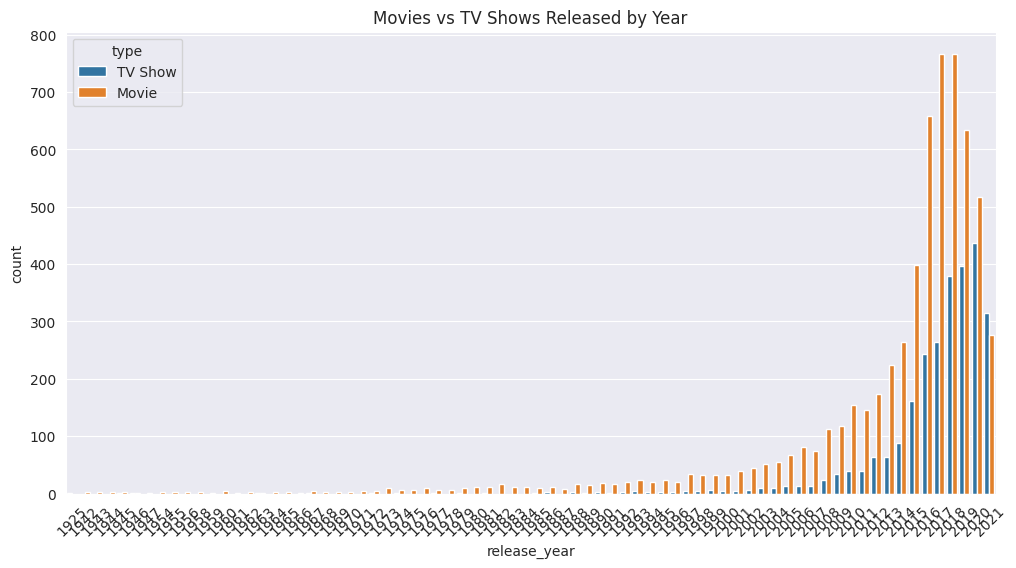

In [11]:
#Multi-variable Analysis: type vs rating vs year
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', hue='type', data=df)
plt.title("Movies vs TV Shows Released by Year")
plt.xticks(rotation=45)
plt.show()


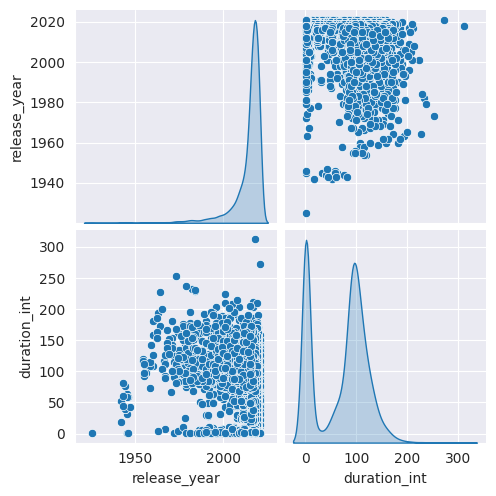

In [12]:
sns.pairplot(df[[ 'release_year', 'duration_int' ]].dropna(), diag_kind='kde')
plt.show()
